In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [5]:
df=pd.read_csv(r'C:\Users\ks123\Downloads\learnbay\machine learning practise\USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
#we need to predict the house price

In [8]:
df.shape

(5000, 7)

In [9]:
#to find information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,4990.0,6.858472e+04,10651.192423,17796.631190,61481.465105,6.879767e+04,7.577915e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,4995.0,6.987693e+00,1.005938,3.236194,6.299156,7.002940e+00,7.665622e+00,1.075959e+01
Avg. Area Number of Bedrooms,4994.0,3.981874e+00,1.234497,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928700,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626584,15938.657920,997577.135075,1.232669e+06,1.471210e+06,2.469066e+06


In [12]:
# There may be some ouliers on this data bcz there is large difference between max value and other value
#scaling is required
#Null values in data

### Data Preperation/Data cleaning

In [13]:
#Check for duplicate rows
df.duplicated().sum()

0

In [14]:
#Missing values

In [16]:
df.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

In [18]:
#Missing value in terms of percentage
df.isnull().sum()/len(df)*100

Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

In [20]:
#check for the outlier and then we will decide how to fill null values

<AxesSubplot:ylabel='Avg. Area Income'>

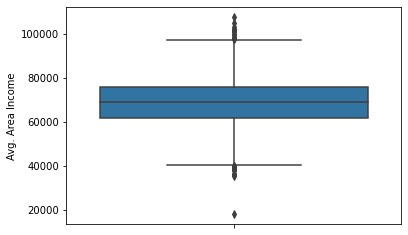

In [21]:
sns.boxplot(y='Avg. Area Income',data=df)

In [22]:
df['Avg. Area Income']=df['Avg. Area Income'].fillna(df['Avg. Area Income'].median())

In [23]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       5
Avg. Area Number of Bedrooms    6
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [24]:
#Avg. Area Number of Rooms 

<AxesSubplot:ylabel='Avg. Area Number of Rooms'>

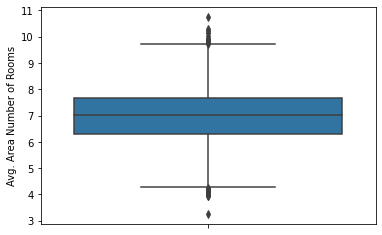

In [26]:
sns.boxplot(y='Avg. Area Number of Rooms',data=df)

In [27]:
df['Avg. Area Number of Rooms']=df['Avg. Area Number of Rooms'].fillna(df['Avg. Area Number of Rooms'].median())

In [28]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    6
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [29]:
#Avg. Area Number of Bedrooms

<AxesSubplot:ylabel='Avg. Area Number of Bedrooms'>

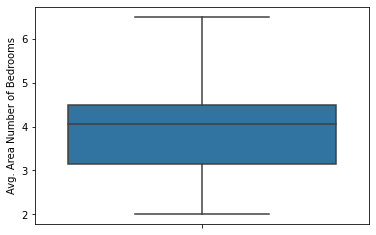

In [31]:
sns.boxplot(y='Avg. Area Number of Bedrooms',data=df)

In [32]:
df['Avg. Area Number of Bedrooms']=df['Avg. Area Number of Bedrooms'].fillna(df['Avg. Area Number of Bedrooms'].median())

In [33]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [34]:
#no null value

In [36]:
df.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
2488,61679.17116,6.353167,7.111842,5.41,34867.98508,1103021.383,"PSC 7611, Box 8172\nAPO AE 25615-0900"
2412,72099.66539,5.546065,6.466645,3.41,36902.14539,1411054.317,"636 Smith Greens\nAlexland, AK 05521"
1919,78190.14178,4.937298,6.503606,3.45,35279.61694,1153605.031,"47908 Carter Haven\nNorth Taylor, NV 99636"
2141,76850.37944,5.235429,6.376401,4.04,36333.48147,1315666.874,"8088 Miller Plains\nMollyport, AK 44811-8095"
3690,73021.65256,5.292058,7.217836,6.29,37090.97603,1270543.464,"7026 John Junction Apt. 677\nWest Donnatown, W..."


In [37]:
#Handle address column

In [38]:
df['Address'].nunique()

5000

In [39]:
df['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [40]:
df['Address'][2]

'9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489'

In [41]:
df['Address'][100]

'124 Russell Mountains Apt. 591\nNorth Sharonfurt, OH 67836-4969'

In [45]:
df['state']=df['Address'].apply(lambda x: x.split(' ')[-2])
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,state
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",NE
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",CA
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",WI
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820,AP
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386,AE


In [46]:
df.drop(columns='Address',inplace=True)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,state
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,NE
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,CA
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,WI
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,AP
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,AE


In [49]:
df['state'].unique()

array(['NE', 'CA', 'WI', 'AP', 'AE', 'KS', 'CO', 'TN', 'AA', 'NM', 'PW',
       'AR', 'HI', 'ME', 'IN', 'MI', 'DE', 'AZ', 'MA', 'MN', 'AL', 'NY',
       'NV', 'VA', 'ID', 'OK', 'NH', 'MO', 'WV', 'WY', 'MH', 'UT', 'SD',
       'CT', 'AK', 'WA', 'RI', 'NJ', 'KY', 'NC', 'IA', 'VT', 'FM', 'ND',
       'LA', 'MP', 'OR', 'TX', 'DC', 'PR', 'MT', 'AS', 'OH', 'MS', 'IL',
       'VI', 'GA', 'PA', 'MD', 'SC', 'GU', 'FL'], dtype=object)

In [50]:
df['state'].value_counts()

AA    177
AP    170
AE    167
GU     91
OR     91
     ... 
KS     67
WI     67
IL     64
MD     62
VI     55
Name: state, Length: 62, dtype: int64

### EDA

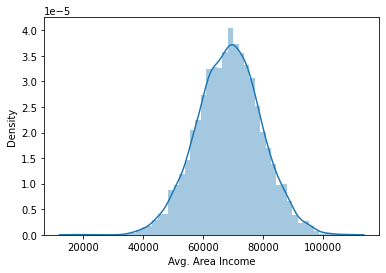

C:\Users\ks123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


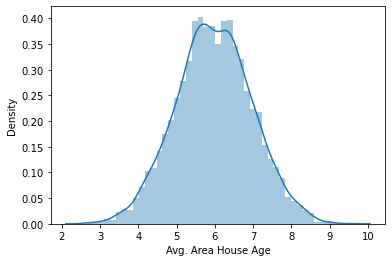

C:\Users\ks123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


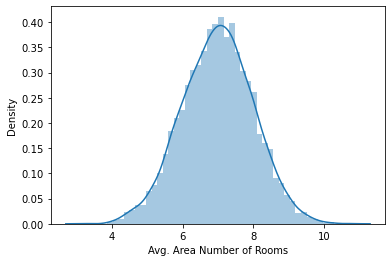

C:\Users\ks123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


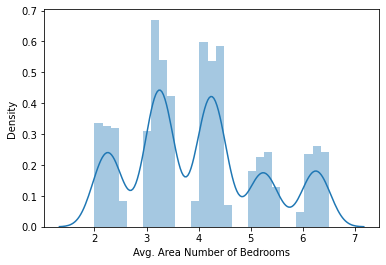

C:\Users\ks123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


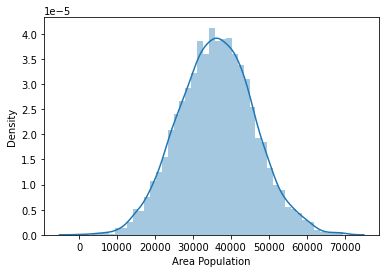

C:\Users\ks123\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


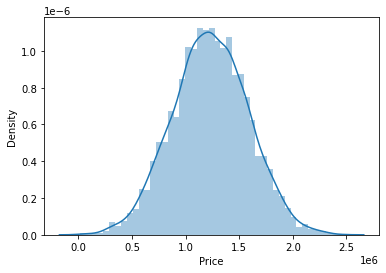

In [58]:
num_col=df.select_dtypes(include=['number']).columns
for i in num_col:
    sns.distplot(df[i])
    plt.show()

In [59]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'state'],
      dtype='object')

In [64]:
for i in num_col:
    print(i,'-------------',df[i].skew())

Avg. Area Income ------------- -0.030196116416445953
Avg. Area House Age ------------- -0.0072138723681024605
Avg. Area Number of Rooms ------------- -0.04123846987381095
Avg. Area Number of Bedrooms ------------- 0.3757299663153947
Area Population ------------- 0.05064968155015881
Price ------------- -0.0027180649317752378


In [65]:
#handling of outlier

In [66]:
filtered_df=df.copy()

In [68]:
filtered_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,state
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,NE
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,CA
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,WI
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,AP
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,AE


<AxesSubplot:>

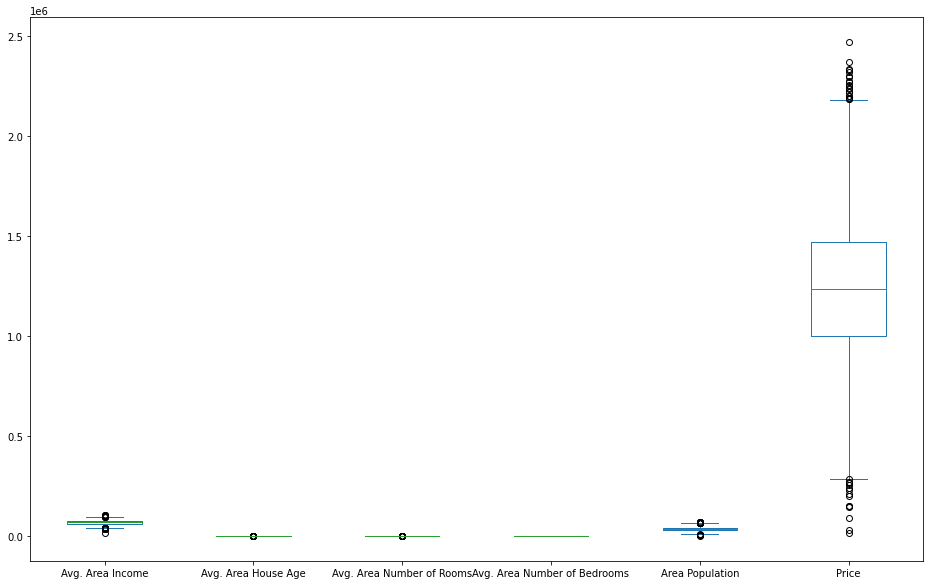

In [76]:
filtered_df.plot(kind='box',figsize=(16,10))

In [77]:
#IQR

In [78]:
q1=np.percentile(filtered_df['Avg. Area Income'],25)
q3=np.percentile(filtered_df['Avg. Area Income'],75)
iqr=q3-q1

#set threshold
lower_threshold=q1-1.5*iqr
upper_threshold=q3-1.5*iqr

print('Lower Threshold',lower_threshold)
print('Upper Threshold',upper_threshold)

Lower Threshold 40063.096827499976
Upper Threshold 54344.465737499995


<AxesSubplot:>

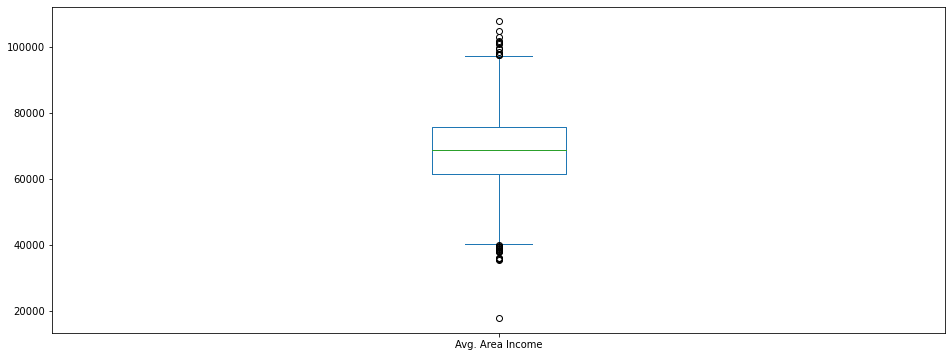

In [79]:
filtered_df['Avg. Area Income'].plot(kind='box', figsize=(16,6))